<a href="https://www.kaggle.com/code/mansipanchal24/eda-statistical-analysis-retail?scriptVersionId=189279690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/large-retail-data-set-for-eda/retail_data.csv


In [2]:
path = '/kaggle/input/large-retail-data-set-for-eda/retail_data.csv'
retail_df = pd.read_csv(path)

Firstly I explored the data a little, got used to the fields, values etc and discovered there's both categorical and numerical values. There are no null values in this dataset.

In [3]:
retail_df.describe()

,customer_id,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,...,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,48.496605,4.497453,2.000554,499891.731447,4999.564515,5.002649,500.261317,0.249910,11.505193,...,0.250137,5.054372,181.876207,499.920037,54993.644773,54972.766714,49.979109,9.496269,49.512951,182.027559
std,288675.278932,17.874381,2.872406,1.414214,288706.057652,2886.798391,2.583751,288.462860,0.144328,6.924460,...,0.144408,2.857848,105.228855,288.453056,25975.807799,25981.483139,28.860989,5.761233,28.869777,105.364598
min,1.000000,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,250000.750000,33.000000,2.000000,1.000000,249878.750000,2498.000000,3.000000,250.310000,0.130000,5.000000,...,0.130000,2.580000,91.000000,250.000000,32477.750000,32473.000000,24.970000,4.000000,25.000000,91.000000
50%,500000.500000,49.000000,4.000000,2.000000,499559.500000,4999.000000,5.000000,500.410000,0.250000,12.000000,...,0.250000,5.060000,182.000000,500.000000,54966.000000,54961.000000,49.960000,9.000000,50.000000,182.000000
75%,750000.250000,64.000000,7.000000,3.000000,750071.250000,7498.000000,7.000000,750.160000,0.370000,18.000000,...,0.380000,7.530000,273.000000,750.000000,77493.000000,77451.000000,74.950000,14.000000,75.000000,273.000000
max,1000000.000000,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,...,0.500000,10.000000,364.000000,999.000000,99998.000000,99998.000000,100.000000,19.000000,99.000000,364.000000


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1000000 non-null  int64  
 1   age                        1000000 non-null  int64  
 2   gender                     1000000 non-null  object 
 3   income_bracket             1000000 non-null  object 
 4   loyalty_program            1000000 non-null  object 
 5   membership_years           1000000 non-null  int64  
 6   churned                    1000000 non-null  object 
 7   marital_status             1000000 non-null  object 
 8   number_of_children         1000000 non-null  int64  
 9   education_level            1000000 non-null  object 
 10  occupation                 1000000 non-null  object 
 11  transaction_id             1000000 non-null  int64  
 12  transaction_date           1000000 non-null  object 
 13  product_id   

In [5]:
retail_df.isnull().sum()

customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
                           ..
email_subscriptions         0
app_usage                   0
website_visits              0
social_media_engagement     0
days_since_last_purchase    0
Length: 78, dtype: int64

# Creating visualisations
For a better understanding, below I have tried to visualise the data as much as I can.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


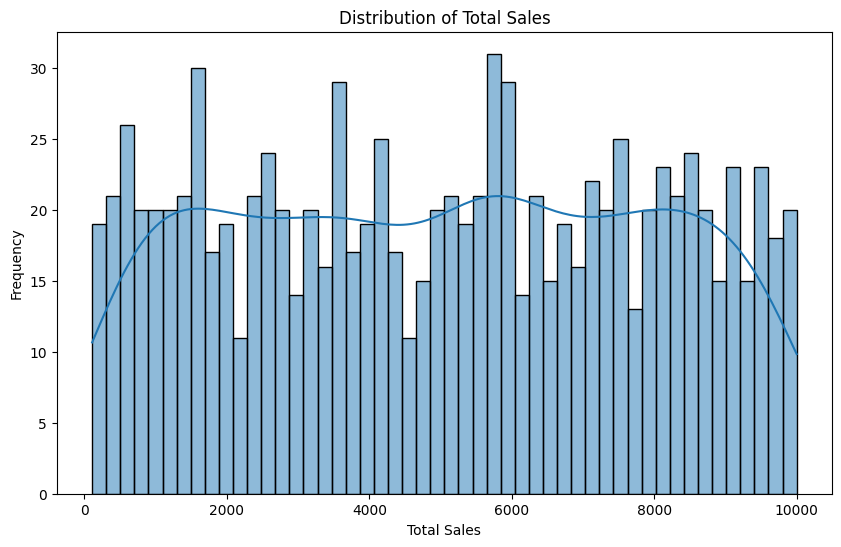

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(retail_df['total_sales'].head(1000), bins=50, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

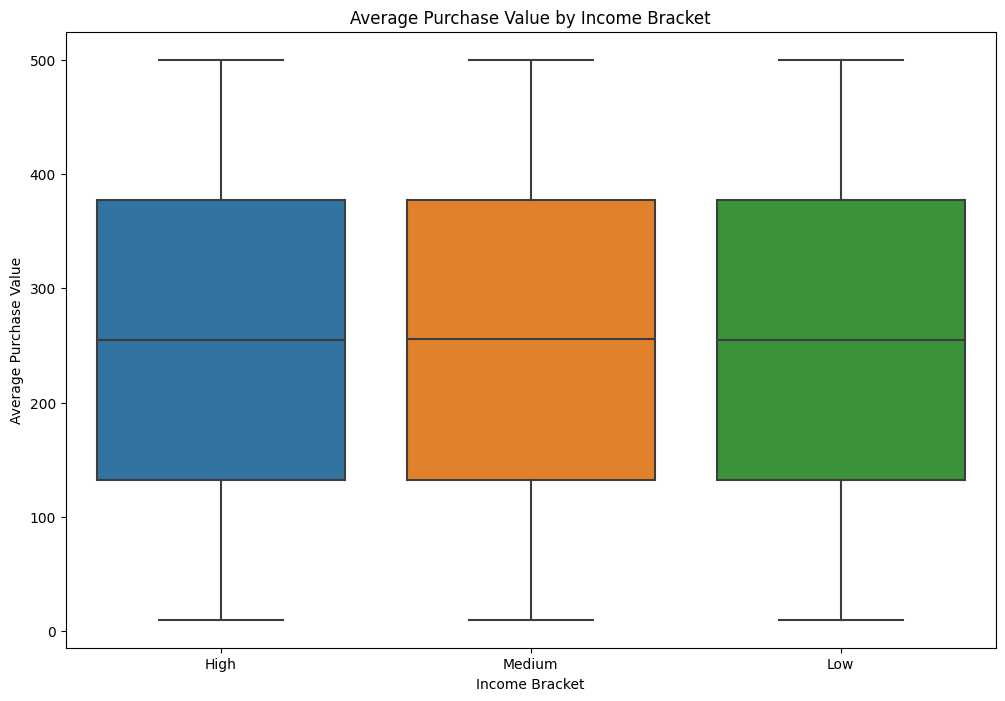

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='income_bracket', y='avg_purchase_value', data=retail_df)
plt.title('Average Purchase Value by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Purchase Value')
plt.show()

# Analysing Customer Information

customer_id: Unique identifier for each customer.

age: Age of the customer.

gender: Gender of the customer (e.g., Male, Female, Other).

income_bracket: Income bracket of the customer (e.g., Low, Medium, High).

loyalty_program: Whether the customer is part of a loyalty program (Yes/No).

membership_years: Number of years the customer has been a member.

churned: Whether the customer has churned (Yes/No) - Target for classification.

marital_status: Marital status of the customer.

number_of_children: Number of children the customer has.

education_level: Education level of the customer (e.g., High School, Bachelor's, Master's).

occupation: Occupation of the customer.

**Firstly, we are gonna sample 10% of the dataset to make computations faster and perform analysis**

In [8]:
retail_sample = retail_df.sample(frac=0.10, random_state=42)

In [9]:
retail_sample.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
987231,987232,60,Female,Medium,Yes,8,Yes,Divorced,3,Master's,...,76.72,Yes,Summer,Yes,1,Yes,Low,75,High,329
79954,79955,63,Other,Low,No,1,Yes,Single,0,High School,...,46.77,No,Winter,Yes,3,Yes,Medium,77,High,145
567130,567131,72,Other,Medium,Yes,0,No,Single,4,High School,...,31.77,Yes,Spring,Yes,14,Yes,Medium,52,Low,95
500891,500892,34,Other,High,Yes,3,No,Divorced,3,Master's,...,94.25,No,Summer,Yes,7,Yes,Low,21,Low,124
55399,55400,77,Other,Medium,No,3,No,Single,4,Master's,...,52.19,Yes,Spring,No,17,No,Low,69,Low,240


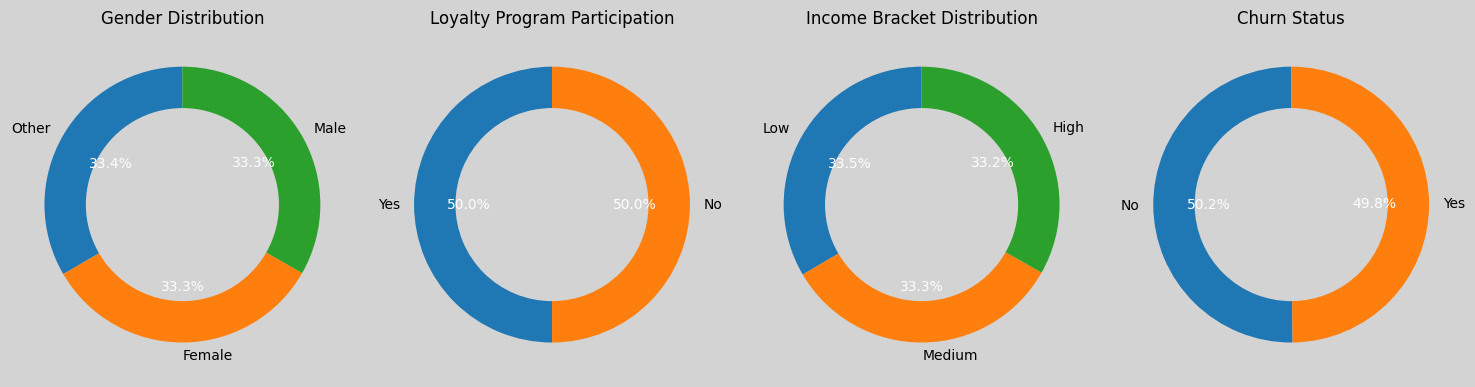

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), subplot_kw=dict(aspect='equal'))
fig.patch.set_facecolor('lightgrey')
# Define a function to create a donut chart
def create_donut(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%',
                                      wedgeprops=dict(width=0.3), startangle=90)
    ax.set_title(title)
    for text in autotexts:
        text.set_color('white')
    for text in texts:
        text.set_color('black')
        
gender_counts = retail_sample['gender'].value_counts()
create_donut(axes[0], gender_counts, gender_counts.index, 'Gender Distribution')

# Plot Donut Chart for 'loyalty_program'
loyalty_counts = retail_sample['loyalty_program'].value_counts()
create_donut(axes[1], loyalty_counts, loyalty_counts.index, 'Loyalty Program Participation')

# Plot Donut Chart for 'income_bracket'
income_counts = retail_sample['income_bracket'].value_counts()
create_donut(axes[2], income_counts, income_counts.index, 'Income Bracket Distribution')

# Plot Donut Chart for 'churned'
churn_counts = retail_sample['churned'].value_counts()
create_donut(axes[3], churn_counts, churn_counts.index, 'Churn Status')

# Adjust layout
plt.tight_layout()
plt.show()

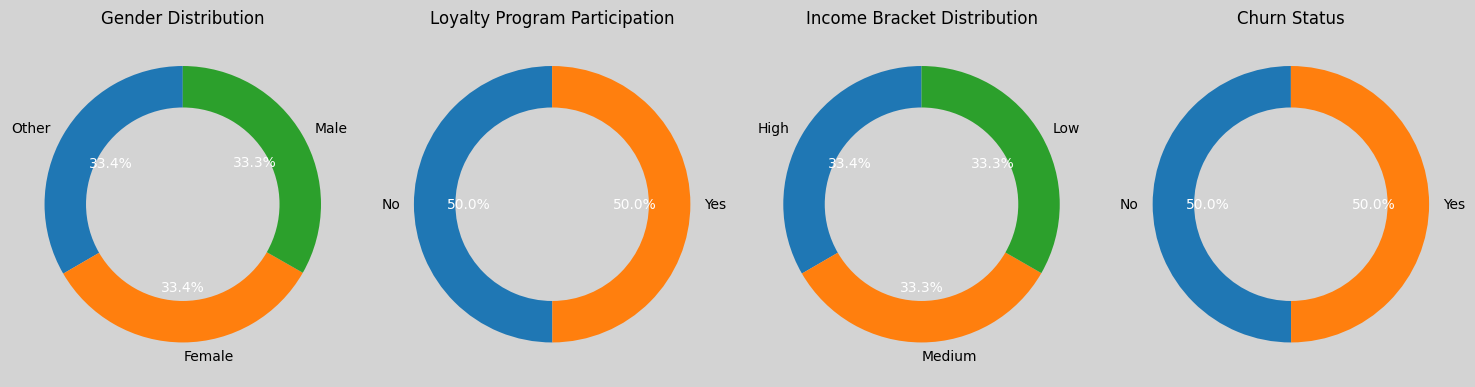

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), subplot_kw=dict(aspect='equal'))
fig.patch.set_facecolor('lightgrey')
# Define a function to create a donut chart
def create_donut(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%',
                                      wedgeprops=dict(width=0.3), startangle=90)
    ax.set_title(title)
    for text in autotexts:
        text.set_color('white')
    for text in texts:
        text.set_color('black')
        
gender_counts = retail_df['gender'].value_counts()
create_donut(axes[0], gender_counts, gender_counts.index, 'Gender Distribution')

# Plot Donut Chart for 'loyalty_program'
loyalty_counts = retail_df['loyalty_program'].value_counts()
create_donut(axes[1], loyalty_counts, loyalty_counts.index, 'Loyalty Program Participation')

# Plot Donut Chart for 'income_bracket'
income_counts = retail_df['income_bracket'].value_counts()
create_donut(axes[2], income_counts, income_counts.index, 'Income Bracket Distribution')

# Plot Donut Chart for 'churned'
churn_counts = retail_df['churned'].value_counts()
create_donut(axes[3], churn_counts, churn_counts.index, 'Churn Status')

# Adjust layout
plt.tight_layout()
plt.show()

> In the above visualisations, we can see that our sample data is generating almost similar results to the whole dataset, therefore, we are safe to assume that **the results we're gonna generate from the sample can represent the whole dataset**.

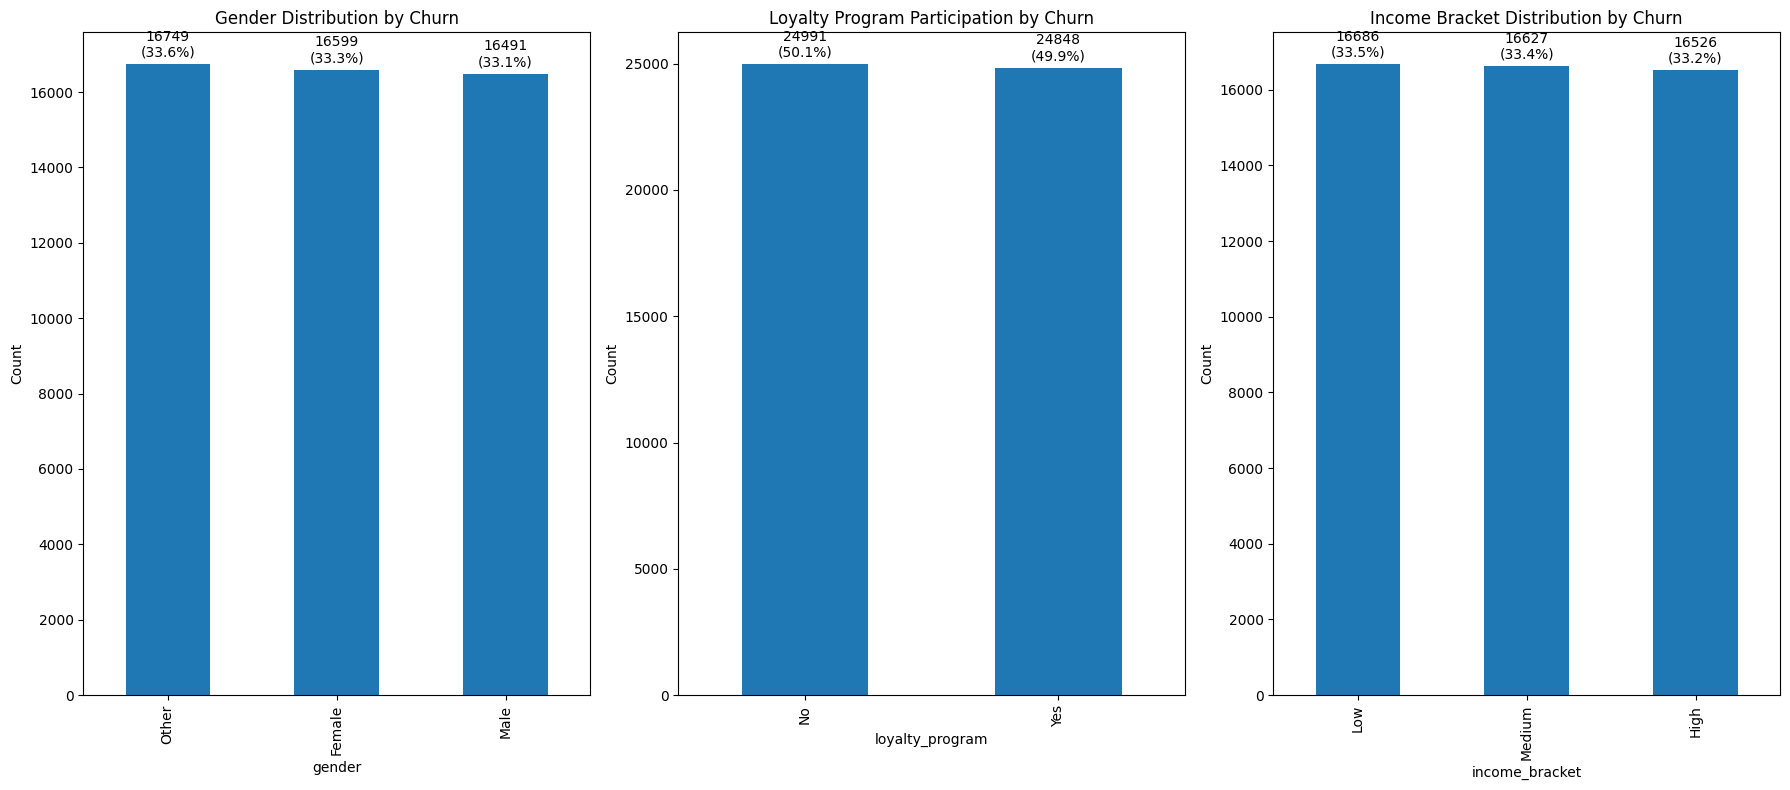

In [12]:
def plot_grouped_bar(data, column, title, ax):
    churn_counts = data[data['churned'] == 'Yes'][column].value_counts()
    no_churn_counts = data[data['churned'] == 'No'][column].value_counts()
    total_churned = churn_counts.sum()
    bars = churn_counts.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    for bar in bars.containers[0]:
        height = bar.get_height()
        ax.annotate(f'{height}\n({height/total_churned:.1%})',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

plot_grouped_bar(retail_sample, 'gender', 'Gender Distribution by Churn', axes[0])
plot_grouped_bar(retail_sample, 'loyalty_program', 'Loyalty Program Participation by Churn', axes[1])
plot_grouped_bar(retail_sample, 'income_bracket', 'Income Bracket Distribution by Churn', axes[2])

plt.tight_layout()
plt.show()

**Performing Statistical Analysis and testing**

In [13]:
from scipy.stats import chi2_contingency, ttest_ind
def chi_sq_test(data, col1, col2, alpha = 0.05):
    cont = pd.crosstab(data[col1], data[col2])
    chi_sq_stat, p_value, dof, expected = chi2_contingency(cont)
     
    if p_value < alpha:
        significance = "The result is statistically significant."
    else:
        significance = "The result is not statistically significant."

    return chi_sq_stat, p_value, significance

categorical_features = ['gender', 'income_bracket', 'loyalty_program', 'marital_status', 'education_level', 'occupation']
for feature in categorical_features:
    print(feature)
    print(chi_sq_test(retail_sample, feature,'churned'))

gender
(2.103412479247596, 0.34934118054695085, 'The result is not statistically significant.')
income_bracket
(0.10094634005998579, 0.9507794377139193, 'The result is not statistically significant.')
loyalty_program
(0.84089666951281, 0.35914044878114937, 'The result is not statistically significant.')
marital_status
(0.12943777804468476, 0.9373309203567541, 'The result is not statistically significant.')
education_level
(2.302110702994061, 0.5121166729178217, 'The result is not statistically significant.')
occupation
(4.78973565411202, 0.18785727451172002, 'The result is not statistically significant.')


In [14]:
numerical_features = ['age', 'membership_years', 'number_of_children']
def ttest( g1, g2, alpha=0.05):
    test_stat, p_value = ttest_ind(g1, g2, equal_var=False)
    if p_value < alpha:
        significance = "The result is statistically significant."
    else:
        significance = "The result is not statistically significant."
    return test_stat, p_value, significance
    
for feature in numerical_features:
    print(f"\nT-Test for {feature}:")
    churned_group = retail_sample[retail_sample['churned'] == 'Yes'][feature]
    non_churned_group = retail_sample[retail_sample['churned'] == 'No'][feature]
    print(ttest(churned_group, non_churned_group))


T-Test for age:
(0.5515202964253747, 0.5812782895425346, 'The result is not statistically significant.')

T-Test for membership_years:
(-1.0023255560297955, 0.3161888091019441, 'The result is not statistically significant.')

T-Test for number_of_children:
(0.0804939078316233, 0.9358446024584572, 'The result is not statistically significant.')


# Analysing Transaction Data

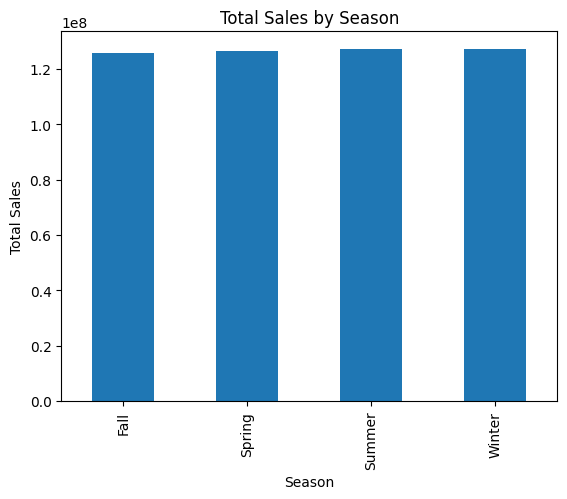

In [15]:
sales_by_season = retail_sample.groupby('season')['total_sales'].sum()

# Plot
sales_by_season.plot(kind='bar')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

product_id
493     127203.20
6041    127146.92
1380    123362.88
1467    120195.25
3695    120188.12
9443    119698.60
7496    119359.55
2230    118475.67
9226    118313.04
6707    117002.82
Name: total_sales, dtype: float64


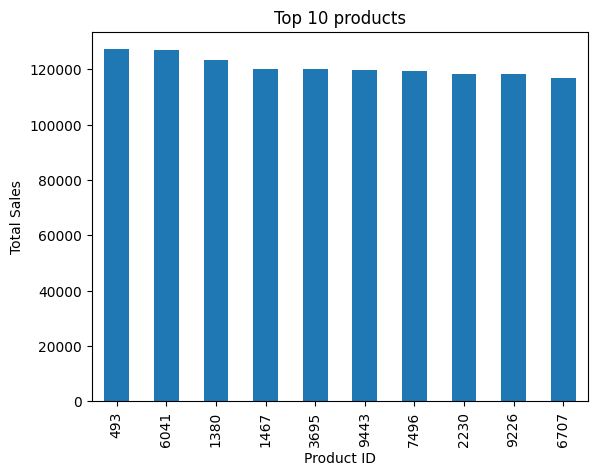

In [16]:
top_products = retail_sample.groupby('product_id')['total_sales'].sum().sort_values(ascending=False)

# Display top 10 products
print(top_products.head(10))
top_products.head(10).plot(kind='bar')
plt.title('Top 10 products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

product_category
Electronics    1.027193e+08
Toys           1.021091e+08
Clothing       1.013061e+08
Groceries      1.001566e+08
Furniture      9.997791e+07
Name: total_sales, dtype: float64


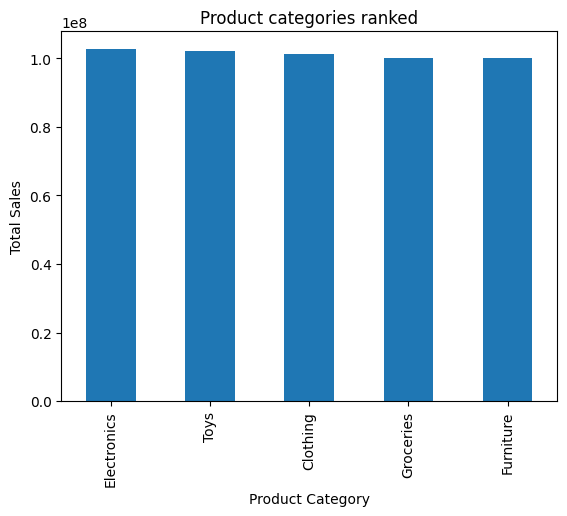

In [17]:
top_productcat = retail_sample.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)

# Display top 10 products
print(top_productcat)
top_productcat.head(10).plot(kind='bar')
plt.title('Product categories ranked')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

In [18]:
promo_sales = retail_sample[retail_sample['promotion_effectiveness'] == 'High']['total_sales']
non_promo_sales = retail_sample[retail_sample['promotion_effectiveness'] != 'High']['total_sales']

print(f'Average Sales during Promotions: {promo_sales.mean()}')
print(f'Average Sales without Promotions: {non_promo_sales.mean()}')

Average Sales during Promotions: 5085.264161362617
Average Sales without Promotions: 5051.335876456


In [19]:
ttest(promo_sales, non_promo_sales)

(1.7719466196377105,
 0.07640795706156187,
 'The result is not statistically significant.')

# Analysing Customer Behavior 

In [20]:
returned = retail_sample.groupby('customer_id')['total_returned_items'].sum().sort_values(ascending=False)
returned

customer_id
461605    9
85698     9
85712     9
184159    9
845363    9
         ..
714685    0
714672    0
714661    0
714604    0
1         0
Name: total_returned_items, Length: 100000, dtype: int64

In [21]:
returned_val = retail_sample.groupby('customer_id')['total_returned_value'].sum().sort_values(ascending=False)
returned_val

customer_id
664166    999.99
305120    999.99
976355    999.99
697362    999.99
783570    999.98
           ...  
328733      0.05
308213      0.05
56267       0.03
455989      0.02
269142      0.02
Name: total_returned_value, Length: 100000, dtype: float64

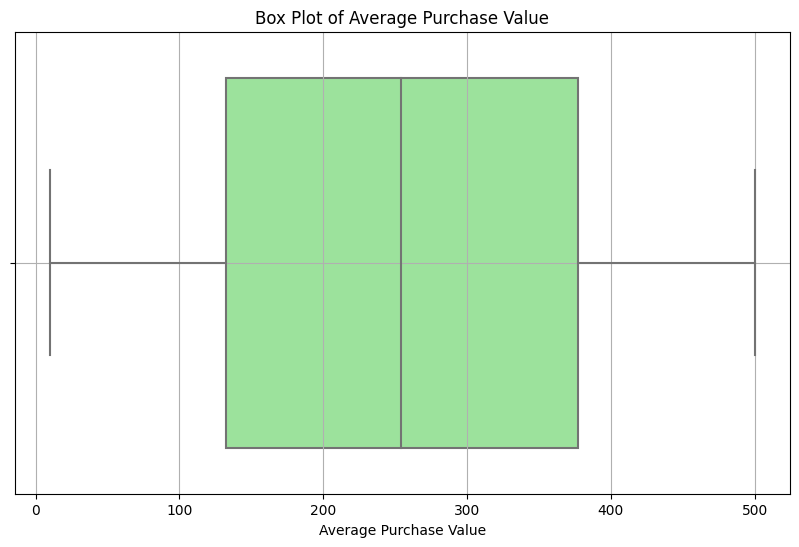

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='avg_purchase_value', data=retail_sample, color='lightgreen')
plt.title('Box Plot of Average Purchase Value')
plt.xlabel('Average Purchase Value')
plt.grid(True)
plt.show()

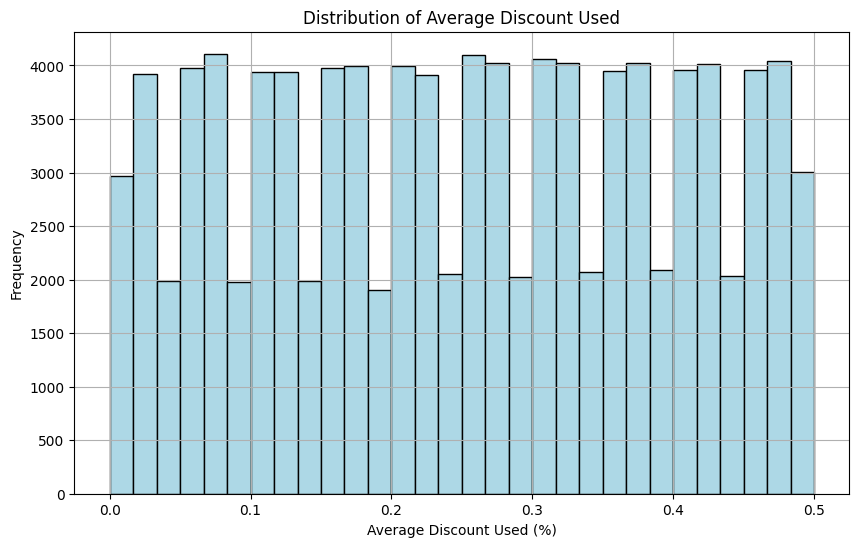

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(retail_sample['avg_discount_used'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Average Discount Used')
plt.xlabel('Average Discount Used (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
disc = retail_sample.groupby('customer_id')['avg_discount_used']
disc.head()

987231    0.49
79954     0.36
567130    0.24
500891    0.43
55399     0.48
          ... 
395942    0.12
417771    0.40
937140    0.35
794022    0.25
573083    0.23
Name: avg_discount_used, Length: 100000, dtype: float64

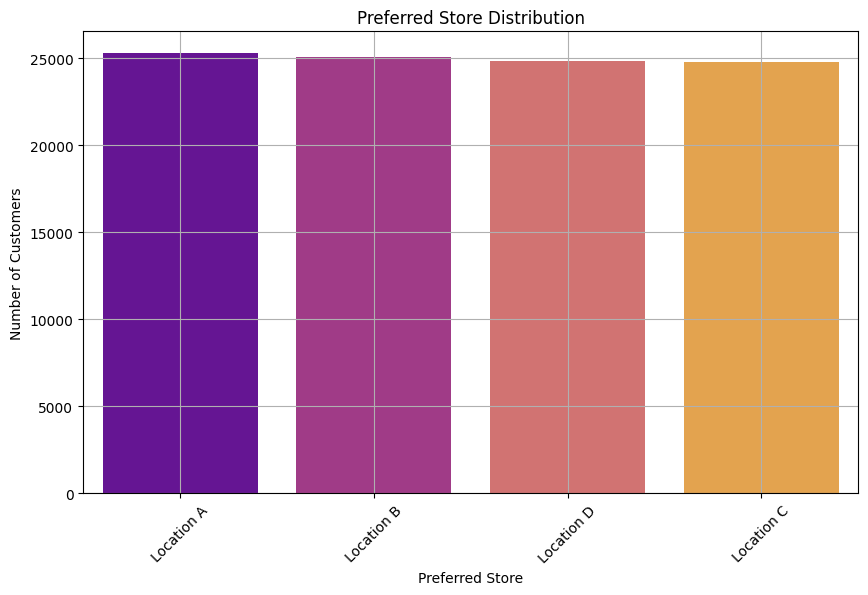

In [25]:
famous_store = retail_sample['preferred_store'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=famous_store.index, y=famous_store.values, palette='plasma')
plt.title('Preferred Store Distribution')
plt.xlabel('Preferred Store')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

online_purchases      4933458
in_store_purchases    4945570
dtype: int64


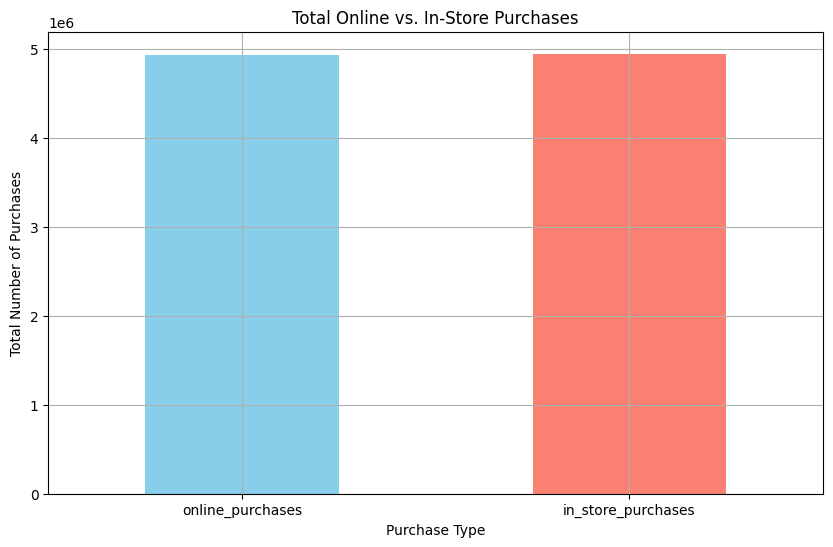

In [26]:
purchase_data = retail_sample[['online_purchases', 'in_store_purchases']].sum()
print(purchase_data)
plt.figure(figsize=(10, 6))
purchase_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Total Online vs. In-Store Purchases')
plt.xlabel('Purchase Type')
plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

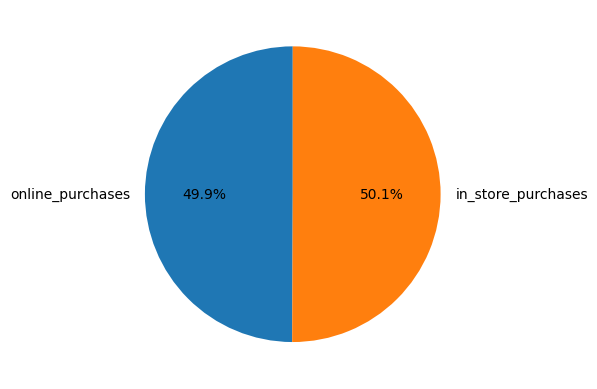

In [27]:
fig, ax = plt.subplots()
ax.pie(purchase_data, labels=['online_purchases', 'in_store_purchases'], autopct='%1.1f%%',
                                      wedgeprops=dict(width=1), startangle=90)

plt.show()

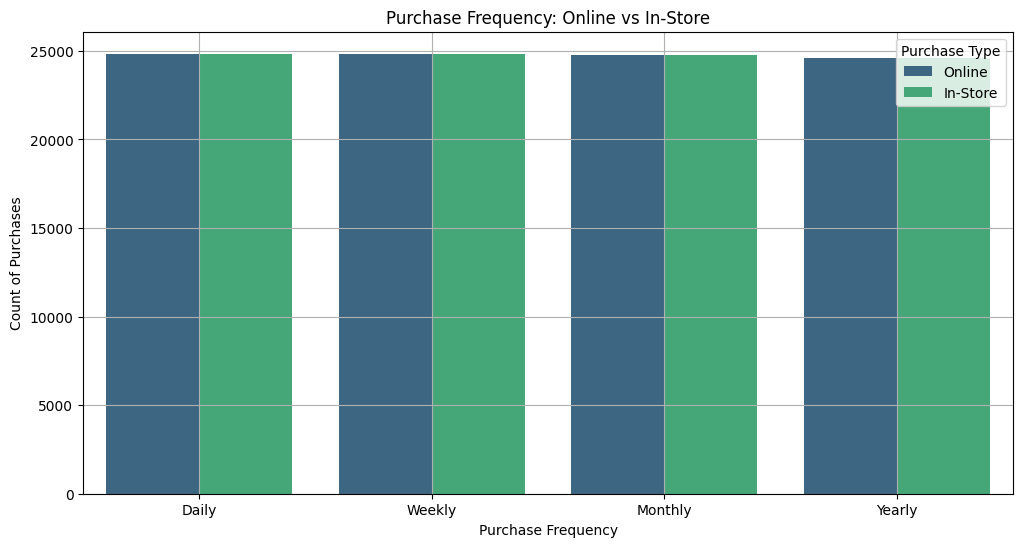

In [28]:
online_freq = retail_sample[retail_sample['online_purchases'] > 0]['purchase_frequency'].value_counts()
instore_freq = retail_sample[retail_sample['in_store_purchases'] > 0]['purchase_frequency'].value_counts()
freq_df = pd.DataFrame({
    'Purchase Frequency': ['Daily', 'Weekly', 'Monthly', 'Yearly'],
    'Online': online_freq.values,
    'In-Store': instore_freq.values
})

plt.figure(figsize=(12, 6))
freq_df_melted = freq_df.melt(id_vars='Purchase Frequency', var_name='Purchase Type', value_name='Count')
sns.barplot(x='Purchase Frequency', y='Count', hue='Purchase Type', data=freq_df_melted, palette='viridis')

plt.title('Purchase Frequency: Online vs In-Store')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count of Purchases')
plt.legend(title='Purchase Type')
plt.grid(True)
plt.show()

# Sales Data Analysis

In [29]:
purchases_disc = retail_sample.groupby('customer_id')['total_items_purchased'].sum().sort_values(ascending=False)
purchases_disc

customer_id
586066    499
734962    499
139719    499
219993    499
199365    499
         ... 
742470      1
474670      1
393299      1
193705      1
211249      1
Name: total_items_purchased, Length: 100000, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


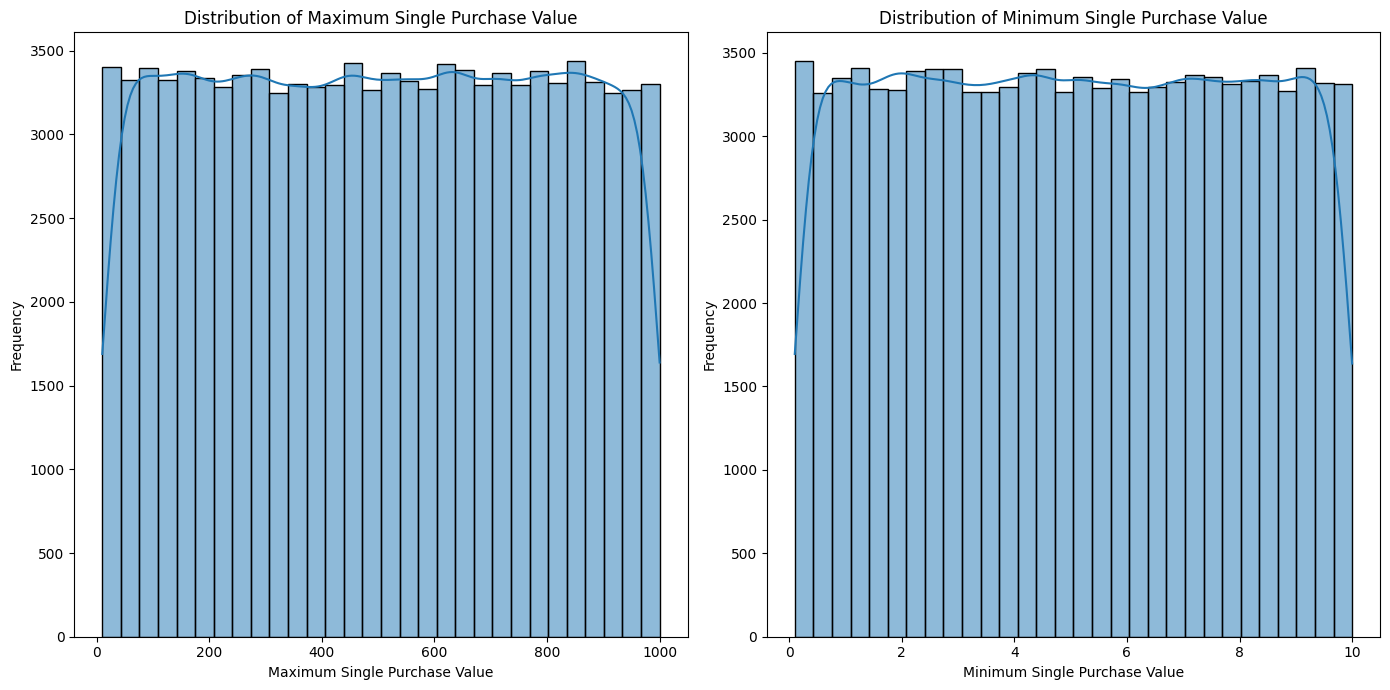

In [30]:
plt.figure(figsize=(14, 7))

# Plotting maximum single purchase value
plt.subplot(1, 2, 1)
sns.histplot(retail_sample['max_single_purchase_value'], bins=30, kde=True)
plt.title('Distribution of Maximum Single Purchase Value')
plt.xlabel('Maximum Single Purchase Value')
plt.ylabel('Frequency')

# Plotting minimum single purchase value
plt.subplot(1, 2, 2)
sns.histplot(retail_sample['min_single_purchase_value'], bins=30, kde=True)
plt.title('Distribution of Minimum Single Purchase Value')
plt.xlabel('Minimum Single Purchase Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


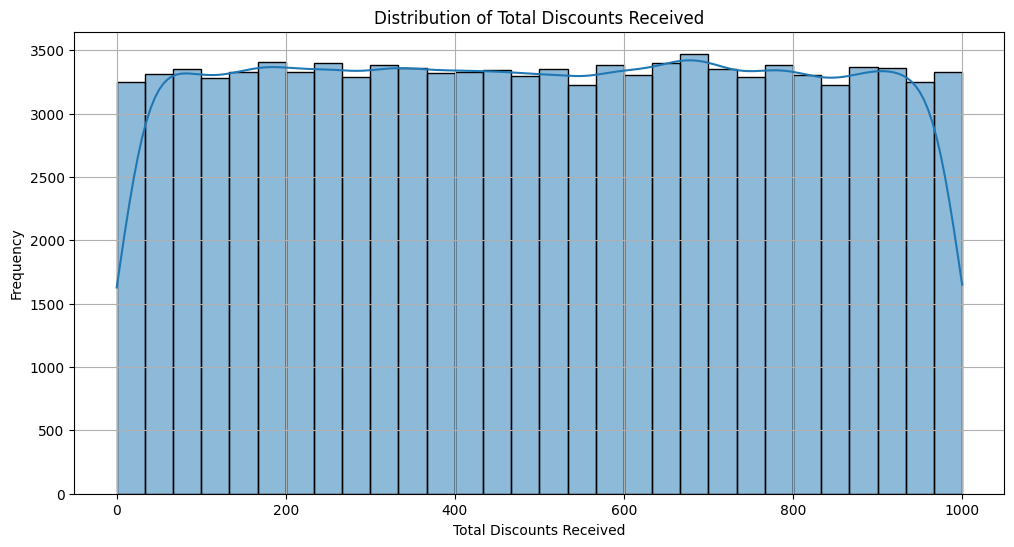

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(retail_sample['total_discounts_received'], bins=30, kde=True)
plt.title('Distribution of Total Discounts Received')
plt.xlabel('Total Discounts Received')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

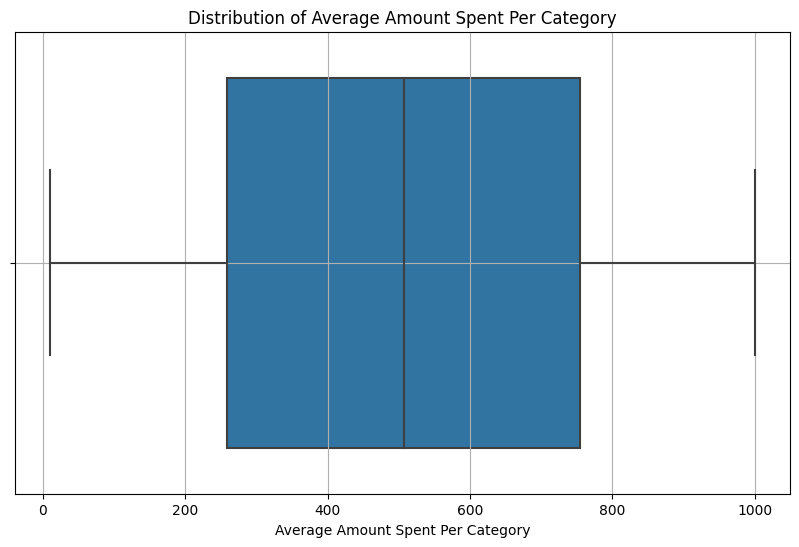

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=retail_sample['avg_spent_per_category'])
plt.title('Distribution of Average Amount Spent Per Category')
plt.xlabel('Average Amount Spent Per Category')
plt.grid(True)
plt.show()

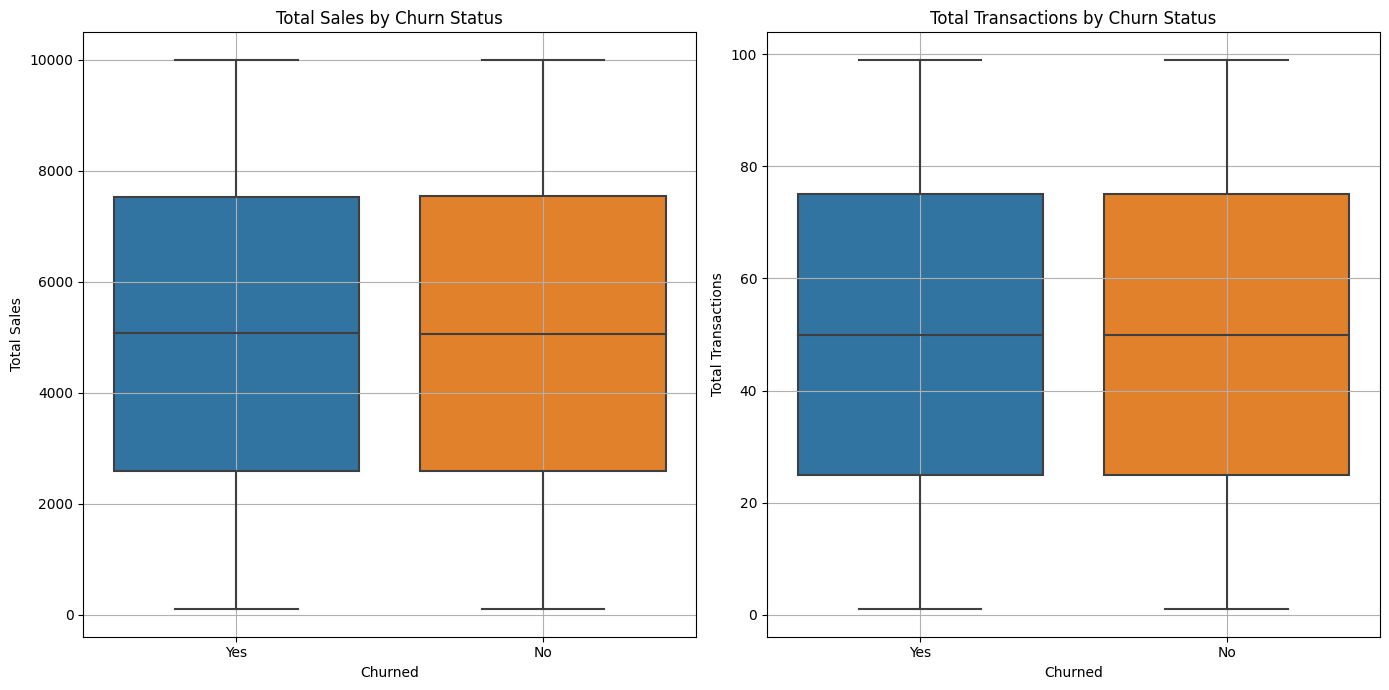

In [33]:
plt.figure(figsize=(14, 7))

# Total Sales by Churn Status
plt.subplot(1, 2, 1)
sns.boxplot(x='churned', y='total_sales', data=retail_sample)
plt.title('Total Sales by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Total Sales')
plt.grid(True)

# Total Transactions by Churn Status
plt.subplot(1, 2, 2)
sns.boxplot(x='churned', y='total_transactions', data=retail_sample)
plt.title('Total Transactions by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Total Transactions')
plt.grid(True)

plt.tight_layout()
plt.show()

# Customer Interaction Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


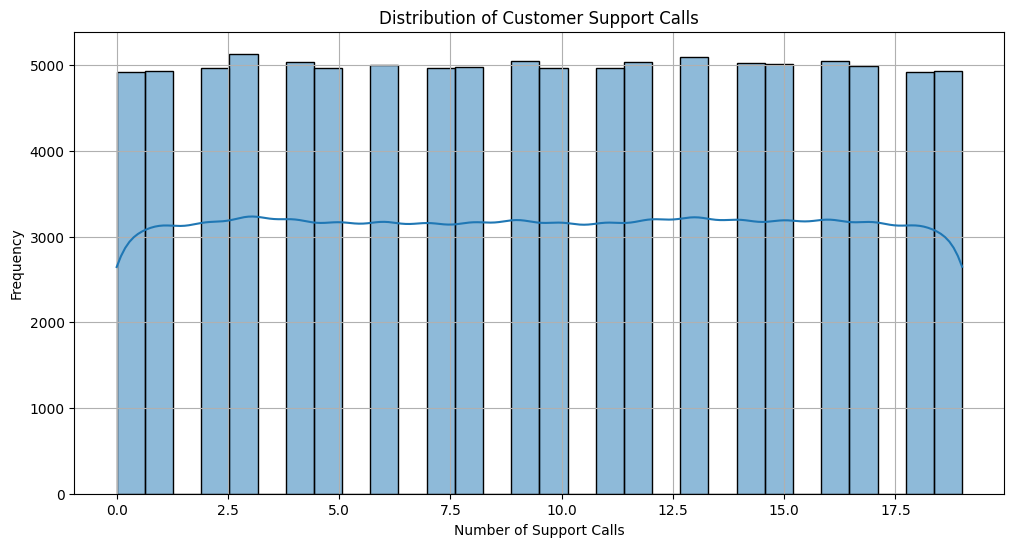

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(retail_sample['customer_support_calls'], bins=30, kde=True)
plt.title('Distribution of Customer Support Calls')
plt.xlabel('Number of Support Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

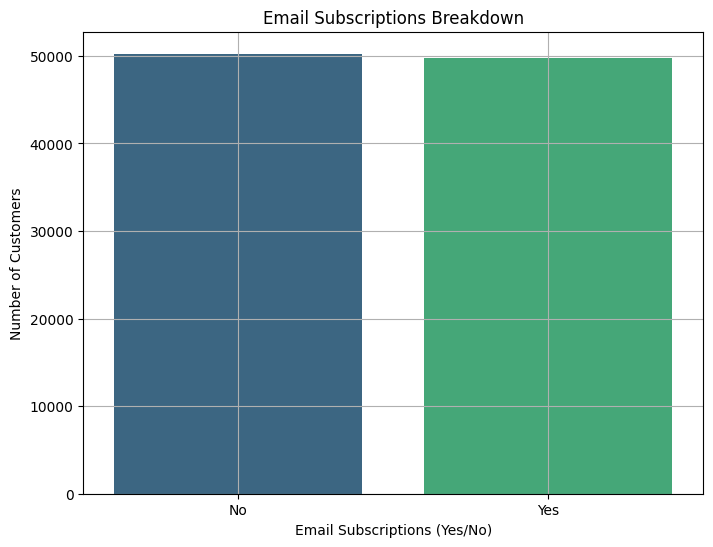

In [35]:
email_subscriptions_count = retail_sample['email_subscriptions'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_subscriptions_count.index, y=email_subscriptions_count.values, palette='viridis')
plt.title('Email Subscriptions Breakdown')
plt.xlabel('Email Subscriptions (Yes/No)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

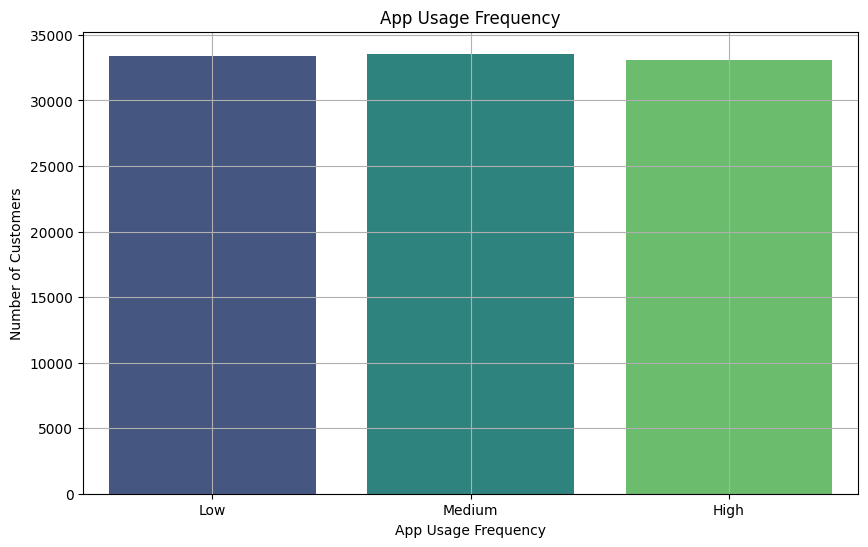

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='app_usage', data=retail_sample, palette='viridis')
plt.title('App Usage Frequency')
plt.xlabel('App Usage Frequency')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


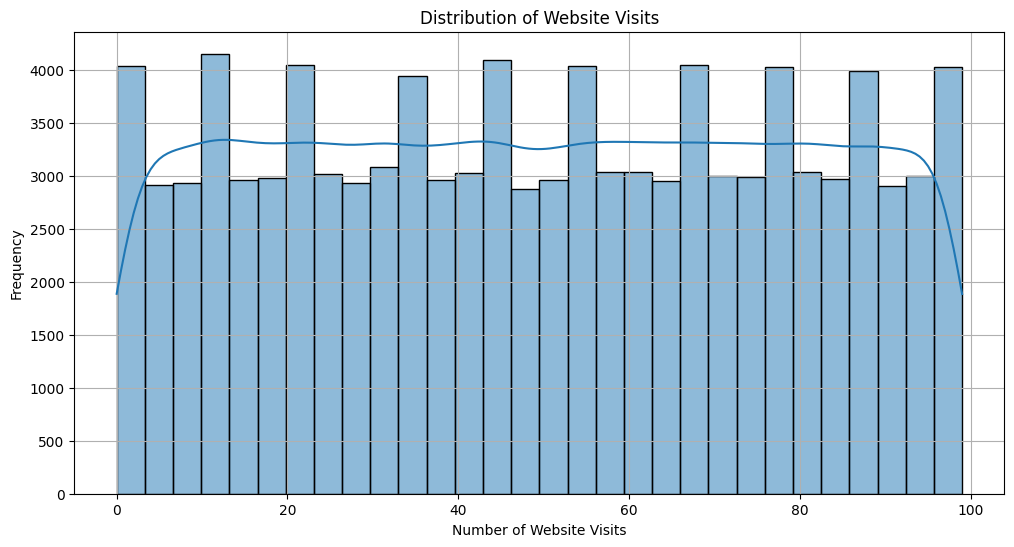

In [37]:
# Website Visits Distribution
plt.figure(figsize=(12, 6))
sns.histplot(retail_sample['website_visits'], bins=30, kde=True)
plt.title('Distribution of Website Visits')
plt.xlabel('Number of Website Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


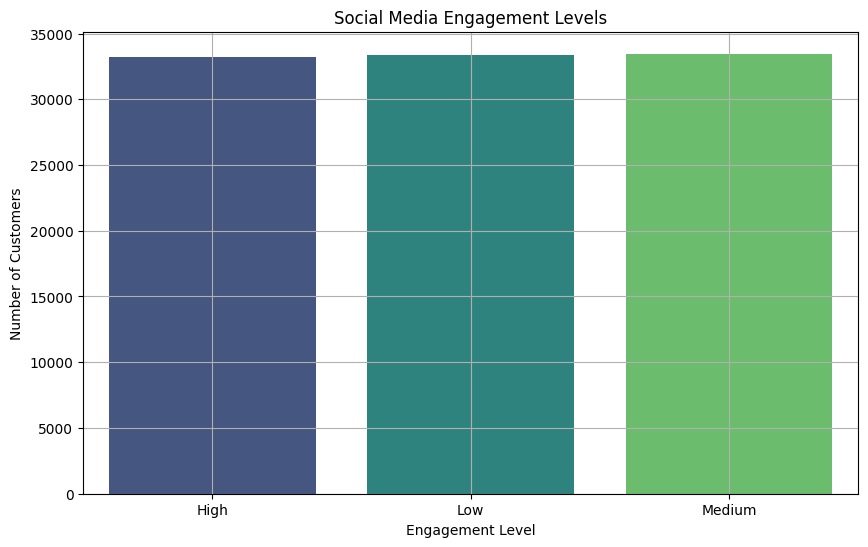

In [38]:
# Social Media Engagement Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='social_media_engagement', data=retail_sample, palette='viridis')
plt.title('Social Media Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

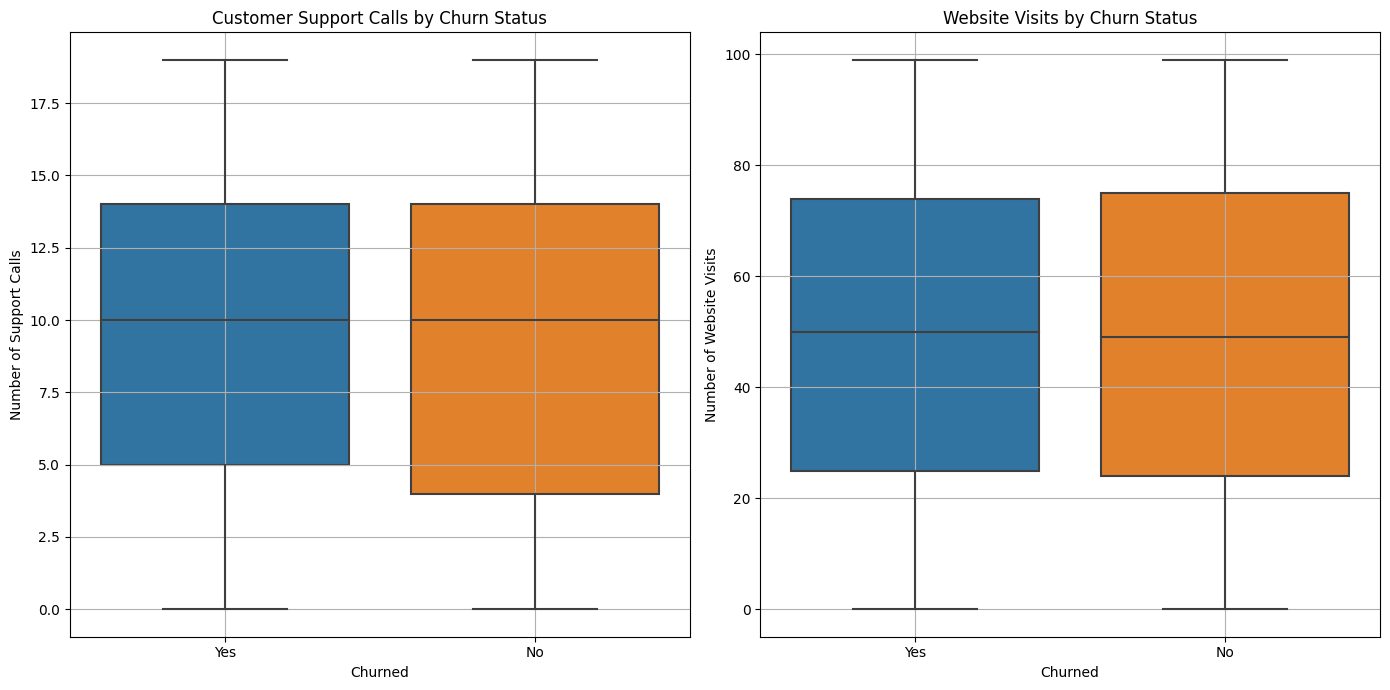

In [39]:
plt.figure(figsize=(14, 7))

# Customer Support Calls by Churn Status
plt.subplot(1, 2, 1)
sns.boxplot(x='churned', y='customer_support_calls', data=retail_sample)
plt.title('Customer Support Calls by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Number of Support Calls')
plt.grid(True)

# Website Visits by Churn Status
plt.subplot(1, 2, 2)
sns.boxplot(x='churned', y='website_visits', data=retail_sample)
plt.title('Website Visits by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Number of Website Visits')
plt.grid(True)

plt.tight_layout()
plt.show()

# Deriving other features

In [40]:
retail_sample['days_since_last_purchase'] = (pd.to_datetime('today') - pd.to_datetime(retail_sample['last_purchase_date'])).dt.days

In [41]:
most_recent_purchase = retail_sample['days_since_last_purchase'].min()
most_recent_purchase

933

In [42]:
most_recent_customers = retail_sample[retail_sample['days_since_last_purchase'] == most_recent_purchase]['customer_id']
most_recent_customers

63224      63225
274636    274637
784382    784383
72683      72684
660057    660058
           ...  
658290    658291
696551    696552
628411    628412
458384    458385
201345    201346
Name: customer_id, Length: 183, dtype: int64